# Introduction (TODO).

** Table of Contents **
<div id="toc"></div>

# Monty Hall

## Problem

The original problem description, as it appears on [Marilyn vos Savant's website](http://marilynvossavant.com/game-show-problem/):

> Suppose you’re on a game show, and you’re given the choice of three doors. Behind one door is a car, behind the others, goats. You pick a door, say \#1, and the host, who knows what’s behind the doors, opens another door, say \#3, which has a goat. He says to you, "Do you want to pick door \#2?" Is it to your advantage to switch your choice of doors?

The answer is 'yes'. For more information on the problem, you can see its entry on [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem).

## Simulation

In [4]:
def select_other(excluded_elements, all_elements):
    """
    excluded_elements, all_elements: two sets
    Return one element of (all_elements - excluded_elements) at random
    """
    remaining_elements = all_elements - excluded_elements
    selected_element = np.random.choice(list(remaining_elements), 1)[0]
    return selected_element  

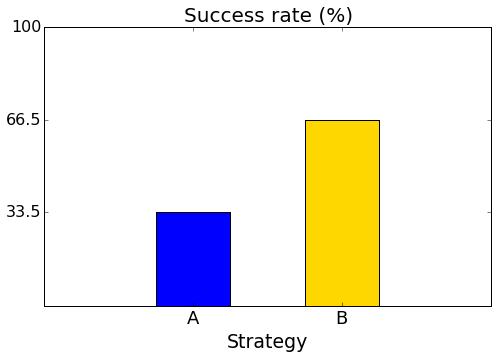

In [5]:
N = 100000 # we repeat the simulation N times

# there are three doors, numbered #1, #2, #3
doors = {1, 2, 3}
# exactly one of them contains the car
door_with_car = np.random.choice(list(doors), N)

# player makes a first guess about the door that contains the car
first_guess = np.random.choice(list(doors), N)

# host opens a door that does not contain the car
# and is different than player's guess
revealed_door = [select_other({first_guess[pos], door_with_car[pos]}, doors) for pos in range(N)]

# player follows one of two strategies:
# either sticks to first guess
second_guess_A = first_guess
# or switches to the remaining door
# (other than first guess and revealed door)
second_guess_B = [select_other({first_guess[pos], revealed_door[pos]}, doors) for pos in range(N)]

# calculate the success rate for each strategy
success_rate_A = sum(second_guess_A == door_with_car) / N
success_rate_B = sum(second_guess_B == door_with_car) / N

fig, ax = plt.subplots(figsize = (8, 5))
ax.set(xlim = (-1, 2), xticks = [0, 1], yticks = [100*success_rate_A, 100*success_rate_B, 100], ylim = (0, 100))
ax.set_title("Success rate (%)", size = 20)
ax.set_xticklabels(["A", "B"], size = 18)
ax.set_xlabel("Strategy", size = 19)
ax.set_yticklabels(["{:.1f}".format(100*success_rate_A), "{:.1f}".format(100*success_rate_B), "100"], size = 16)
_tmp = ax.bar([0], [100*success_rate_A], width = 0.5, align = "center", color = "blue")
_tmp = ax.bar([1], [100*success_rate_B], width = 0.5, align = "center", color = "gold")

# Bertrand's Boxes
From [Wikipedia](https://en.wikipedia.org/wiki/Bertrand%27s_box_paradox):
> There are three boxes, each with one drawer on each of two sides. Each drawer contains a coin. One box has a gold coin on each side (GG), one a silver coin on each side (SS), and the other a gold coin on one side and a silver coin on the other (GS). A box is chosen at random, a random drawer is opened, and a gold coin is found inside it. What is the chance of the coin on the other side being gold?

One might rush to answer '1/2' - but the correct answer is '2/3'.

## Simulation

In [6]:
N = 200000 # we repeat the simulation N times

# there are two kinds of coins involved
GOLD = 1; SILVER = 0

# there are three boxes, each with two drawers
# each drawer contains one coin
box_GG = [GOLD, GOLD]
box_GS = [GOLD, SILVER]
box_SS = [SILVER, SILVER]

boxes = [box_GG, box_GS, box_SS]

def select_drawer(boxes):
    """ randomly select one drawer from one box """
    # select one box at random
    random_choice = np.random.choice(len(boxes))
    chosen_box = boxes[random_choice]
    
    # open one of its two drawers
    opened_drawer, other_drawer = np.random.permutation(chosen_box)
    
    return opened_drawer, other_drawer

# simulate selection of drawer N times
selection = [select_drawer(boxes) for i in range(N)]

opened_drawer = [box[0] for box in selection]
other_drawer  = [box[1] for box in selection]

# mark the cases where we found a gold coin in opened drawer...
found_gold = [coin == GOLD for coin in opened_drawer]
# and among those cases,
# mark the ones where there was a gold coin in the other drawer of the same box
found_gold_also_in_other_drawer = [other_drawer[i] == GOLD for i, f in enumerate(found_gold) if f == True]

# the number of cases we found a gold coin...
num_found_gold = sum(found_gold)
# and among those cases,
# the number of cases there was a gold coin in the other drawer too
num_found_gold_in_other_drawer = sum(found_gold_also_in_other_drawer)

ratio = num_found_gold_in_other_drawer / num_found_gold 

print("Given that we found a Gold coin in the opened drawer,\n"
      "the chances to have a Gold coin in the other drawer, too,\n"
      "are ~{0:.1f}%.".format(100*ratio))


Given that we found a Gold coin in the opened drawer,
the chances to have a Gold coin in the other drawer, too,
are ~66.8%.


# Three Prisoners Problem
From [Wikipedia](https://en.wikipedia.org/wiki/Three_Prisoners_problem):
> Three prisoners, A, B and C, are in separate cells and sentenced to death. The governor has selected one of them at random to be pardoned. The warden knows which one is pardoned, but is not allowed to tell. Prisoner A begs the warden to let him know the identity of one of the others who is going to be executed. "If B is to be pardoned, give me C's name. If C is to be pardoned, give me B's name. And if I'm to be pardoned, flip a coin to decide whether to name B or C."

> The warden tells A that B is to be executed. Prisoner A is pleased because he believes that his probability of surviving has gone up from 1/3 to 1/2, as it is now between him and C. Prisoner A secretly tells C the news, who is also pleased, because he reasons that A still has a chance of 1/3 to be the pardoned one, but his chance has gone up to 2/3. What is the correct answer?

It doesn't look good for A.

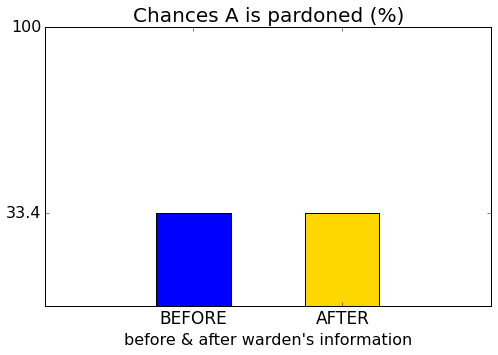

In [7]:
N = 300000 # we repeat the simulation N times

# there are three prisoners
prisoner_A = 0; prisoner_B = 1; prisoner_C = 2

# one of them is pardoned at random
pardoned = np.random.randint(0,3,N)

# we calculate the chances that A is pardoned
# before the warden provides information
a_is_pardoned = [(p == prisoner_A) for p in pardoned]
chances_before = sum(a_is_pardoned) / N

def what_to_say(pardoned_prisoner):
    """
    generate the warden's answer according to
    A's rules
    return the name of a prisoner to be executed
    """
    if pardoned_prisoner == prisoner_A:
        return np.random.choice([prisoner_B, prisoner_C])
    elif pardoned_prisoner == prisoner_B:
        return prisoner_C
    elif pardoned_prisoner == prisoner_C:
        return prisoner_B
    else:
        raise Exception("no such prisoner")

# the warden provides the name of one prisoner
# to be executed (unfortunately)
executed_for_sure = [what_to_say(p) for p in pardoned]

# these are the cases where warden gave B's name...
warden_said_b = [(ex == prisoner_B) for ex in executed_for_sure]
# among those cases, these are the cases that A
# was actually pardoned
warden_said_b_and_a_is_pardoned = [(p == prisoner_A) for i, p in enumerate(pardoned) if warden_said_b[i] == True]

# calculate the chances that A is pardoned
# after the warden's information
chances_after = sum(warden_said_b_and_a_is_pardoned) / sum(warden_said_b)

fig, ax = plt.subplots(figsize = (8, 5))
ax.set(xlim = (-1, 2), xticks = [0, 1], yticks = [100*chances_before, 100], ylim = (0, 100))
ax.set_title("Chances A is pardoned (%)", size = 20)
ax.set_xticklabels(["BEFORE", "AFTER"], size = 17)
ax.set_xlabel("before & after warden's information", size = 16)
ax.set_yticklabels(["{:.1f}".format(100*chances_before), "100"], size = 16)
_tmp = ax.bar([0], [100*chances_before], width = 0.5, align = "center", color = "blue")
_tmp = ax.bar([1], [100*chances_after], width = 0.5, align = "center", color = "gold")

***

# Setup

Run this before the main part.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import IPython
IPython.html.nbextensions.install_nbextension('/Users/mathiom1/Workspace/probability_playground/ext/python-markdown.js')
# IPython.html.nbextensions.check_nbextension('python-markdown.js')

In [5]:
%matplotlib inline

Install the python markdown [extension](https://github.com/ipython-contrib/IPython-notebook-extensions/wiki/python-markdown) and table of contents script.

In [6]:
%%javascript
IPython.load_extensions('python-markdown');
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>